# Machine Learning: Linear Regression

## Black Friday Sales Prediction:

We are going to use a dataset of product purchases during a Black Friday (in the US). The main idea is to be able to generate a predictor that allows us to predict the `purchase amount`.

In order to achieve a good predictor we must apply the different concepts that we have been learning:

* `Exploration`
* `Feature Engineering`
* `Modeling`
* `Evaluation`

The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer `purchase` behaviour against different products. The problem is a `regression problem` where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

### You can try differents Scikit-Learn models from [Linear Models](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

data = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/BlackFriday.csv")
data.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
287383,1002194,P00191442,M,26-35,17,C,3,0,1,2.0,15.0,8058
130087,1001983,P00147942,M,26-35,14,A,3,0,1,16.0,NaN,19297
104368,1004064,P00035642,M,46-50,0,A,1,1,8,NaN,NaN,6121
370791,1003140,P00212842,F,26-35,4,C,1,0,8,16.0,NaN,8130
121991,1000864,P00083842,F,26-35,0,B,3,0,5,14.0,NaN,8676


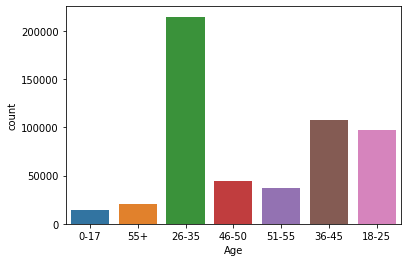

In [2]:
sns.countplot(data=data, x="Age")

---
## Some Exploration

In [ ]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [ ]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [ ]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [ ]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

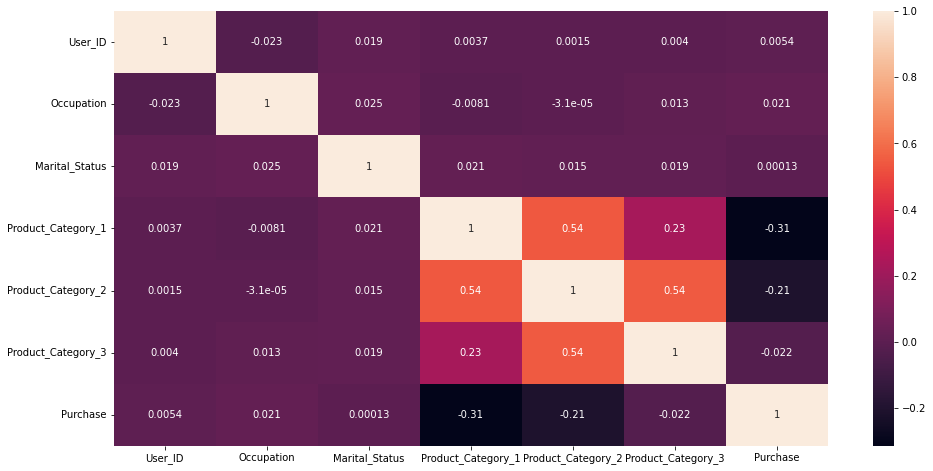

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(data.corr(), annot=True);

In [ ]:
data['Gender'].value_counts(normalize=True)

M    0.754087
F    0.245913
Name: Gender, dtype: float64

In [ ]:
data.groupby(data.Gender).Purchase.max()

Gender
F    23959
M    23961
Name: Purchase, dtype: int64

In [ ]:
data.groupby(data.Gender).Purchase.min()

Gender
F    185
M    185
Name: Purchase, dtype: int64

In [ ]:
data[['Gender', 'Purchase']].groupby('Gender').mean()

,Purchase
Gender,
F,8809.761349
M,9504.771713


In [ ]:
data[['Age', 'Purchase']].groupby('Age').mean()

,Purchase
Age,
0-17,9020.126878
18-25,9235.197575
26-35,9314.588970
36-45,9401.478758
46-50,9284.872277
51-55,9620.616620
55+,9453.898579


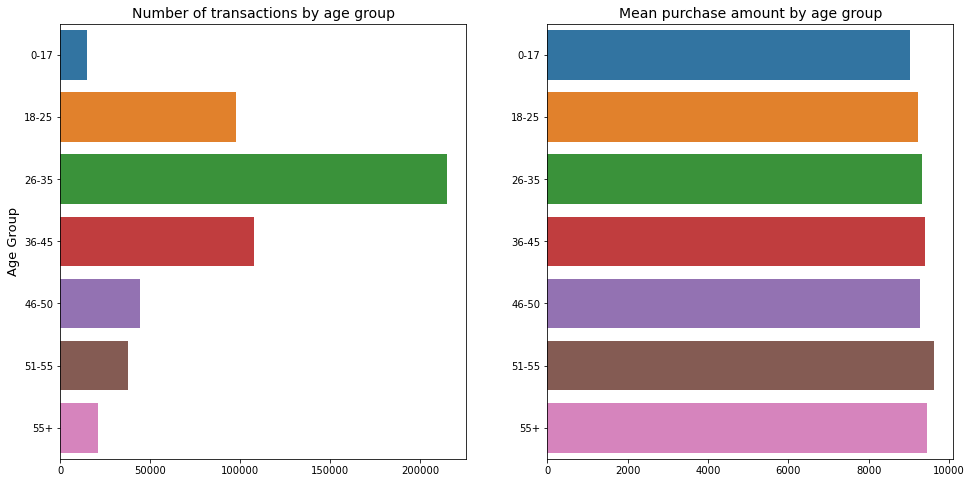

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(121)
sns.countplot(y='Age', data=data, order=sorted(data.Age.unique()))
plt.title('Number of transactions by age group', size=14)
plt.xlabel('')
plt.ylabel('Age Group', size=13)
plt.subplot(122)
age_gb = data[['Age', 'Purchase']].groupby('Age', as_index=False).agg('mean')
sns.barplot(y='Age', x='Purchase', data=age_gb, order=sorted(data.Age.unique()))
plt.title('Mean purchase amount by age group', size=14)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [ ]:
data[['Occupation', 'Purchase']].groupby('Occupation').mean()

,Purchase
Occupation,
0,9186.946726
1,9017.703095
2,9025.938982
3,9238.077277
4,9279.026742
5,9388.848978
6,9336.378620
7,9502.175276
8,9576.508530


In [ ]:
data[['City_Category', 'Purchase']].groupby('City_Category').mean()

,Purchase
City_Category,
A,8958.011014
B,9198.657848
C,9844.441855


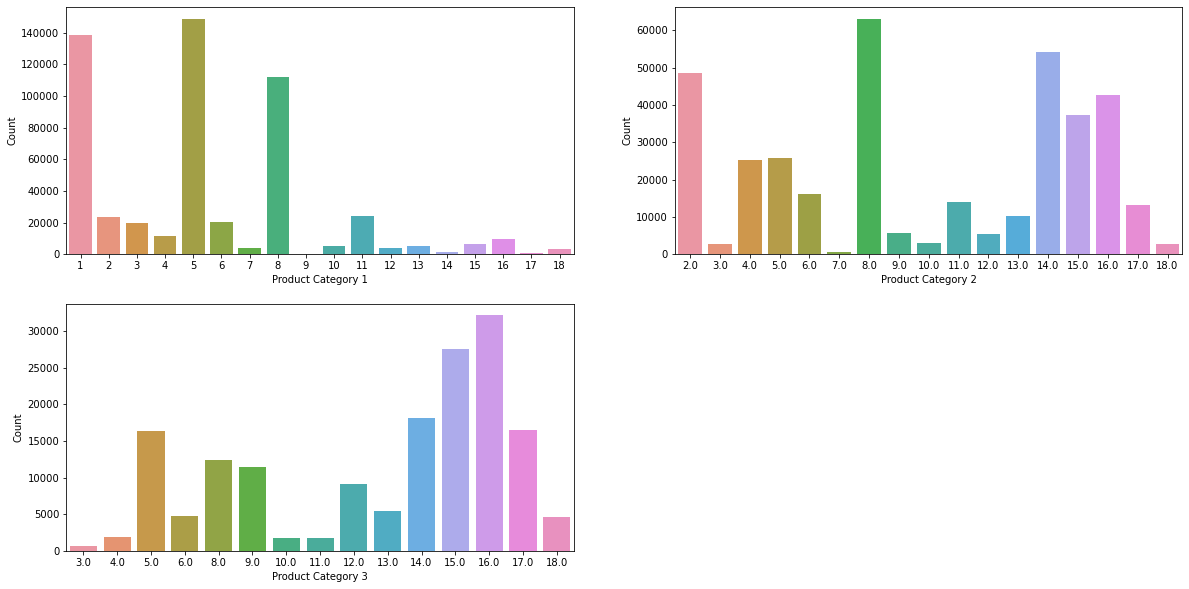

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(221)
sns.countplot(x=data['Product_Category_1'])

plt.xlabel('Product Category 1')
plt.ylabel('Count')

plt.subplot(222)
sns.countplot(x=data['Product_Category_2'])
plt.xlabel('Product Category 2')
plt.ylabel('Count')

plt.subplot(223)
sns.countplot(x=data['Product_Category_3'])
plt.xlabel('Product Category 3')
plt.ylabel('Count');

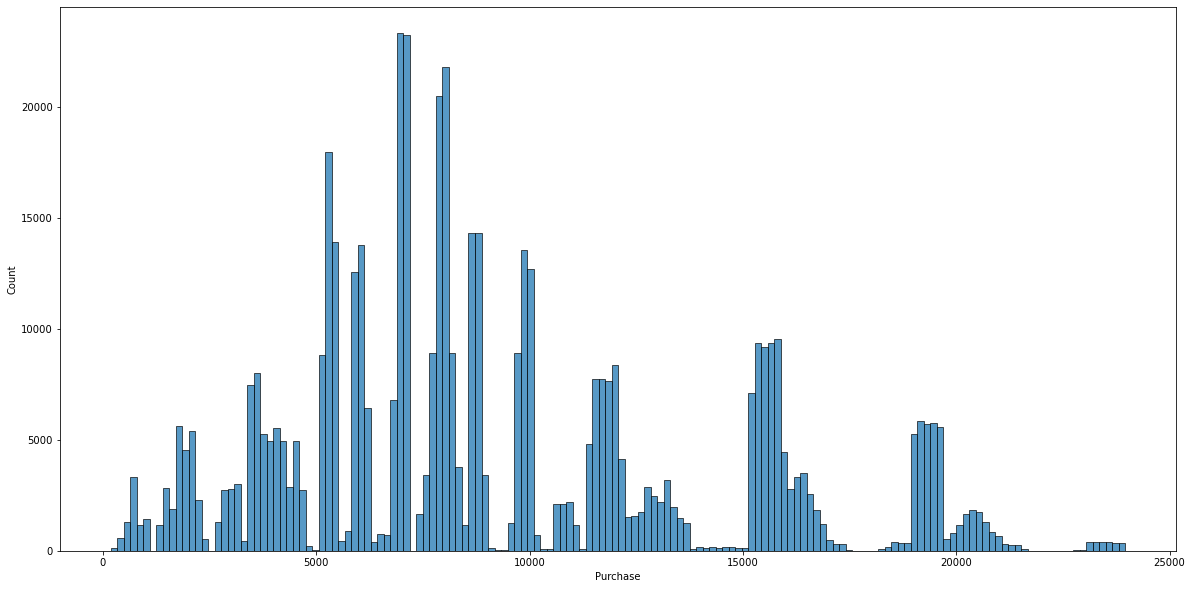

In [ ]:
plt.figure(figsize=(20, 10))
sns.histplot(data['Purchase']);

---
## Feature Engineering

In [ ]:
# Drop columns
data = data.drop(['User_ID', 'Product_ID', 'Product_Category_3'], axis=1)

# Impute with median
median = data['Product_Category_2'].median()
data['Product_Category_2'].fillna(median, inplace=True)

data.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
        
categoricals = [
    'Gender', 'Age', 'Occupation', 'City_Category',
    'Stay_In_Current_City_Years', 'Product_Category_1',
    'Product_Category_2'
]

encoder = OneHotEncoder().fit(data[categoricals])
data = pd.concat(
    [
        data,
        pd.DataFrame(
            encoder.transform(data[categoricals]).toarray(),
            index=data.index,
            columns=encoder.get_feature_names(categoricals)
        )
    ],
    axis=1
)
data.drop(categoricals, axis=1, inplace=True)

In [ ]:
y = data['Purchase']
X = data.drop(['Purchase'], axis=1)

print("Shape of x: ", X.shape)
print("Shape of y: ", y.shape)

Shape of x:  (537577, 74)
Shape of y:  (537577,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

---
## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---
## Modeling

#### LinearRegression model

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#### Ridge model

In [ ]:
from sklearn.linear_model import Ridge

ri = Ridge()
ri.fit(X_train, y_train)
y_pred_ri = ri.predict(X_test)

#### SGDRegressor model

In [ ]:
from sklearn.linear_model import SGDRegressor

sd = SGDRegressor(max_iter=2000, tol=1e-3)
sd.fit(X_train, y_train)
y_pred_sd = sd.predict(X_test)

---
## Metrics

#### LinearRegression model

In [ ]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("RMSE Error:", np.sqrt(mse_lr))

r2_lr = r2_score(y_test, y_pred_lr)
print("R2 Score:", r2_lr)

RMSE Error: 3025.958174709237
R2 Score: 0.6319711378579292


#### Ridge model

In [ ]:
mse_ri = mean_squared_error(y_test, y_pred_ri)
print("RMSE Error:", np.sqrt(mse_ri))

r2_ri = r2_score(y_test, y_pred_ri)
print("R2 Score:", r2_ri)

RMSE Error: 3025.6398217502483
R2 Score: 0.6320485724470974


#### SGDRegressor model

In [ ]:
mse_sd = mean_squared_error(y_test, y_pred_sd)
print("RMSE Error:", np.sqrt(mse_sd))

r2_sd = r2_score(y_test, y_pred_sd)
print("R2 Score:", r2_sd)

RMSE Error: 3037.347093993959
R2 Score: 0.6291955946888173


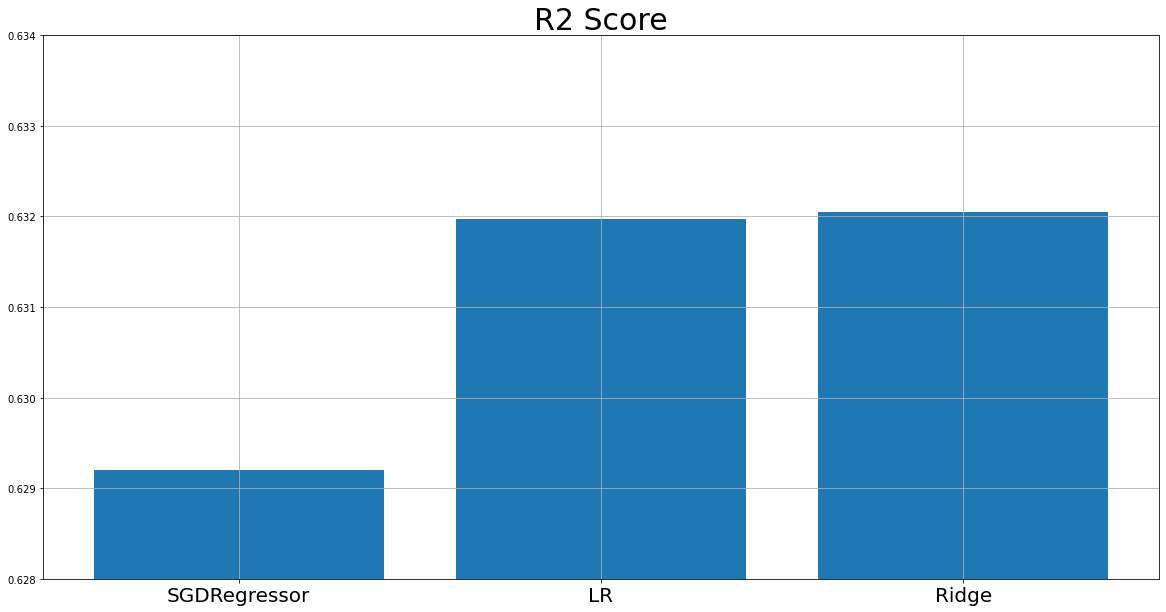

In [ ]:
r2_score = np.array([r2_lr, r2_ri, r2_sd])
labels = np.array(['LR', 'Ridge', 'SGDRegressor'])
indices = np.argsort(r2_score)

plt.figure(figsize=(20, 10))
plt.bar(range(len(indices)), r2_score[indices])
plt.xticks(range(len(indices)), labels[indices], fontsize=20)
plt.title('R2 Score', fontsize=30)
plt.grid()
plt.ylim([0.628, 0.634]);

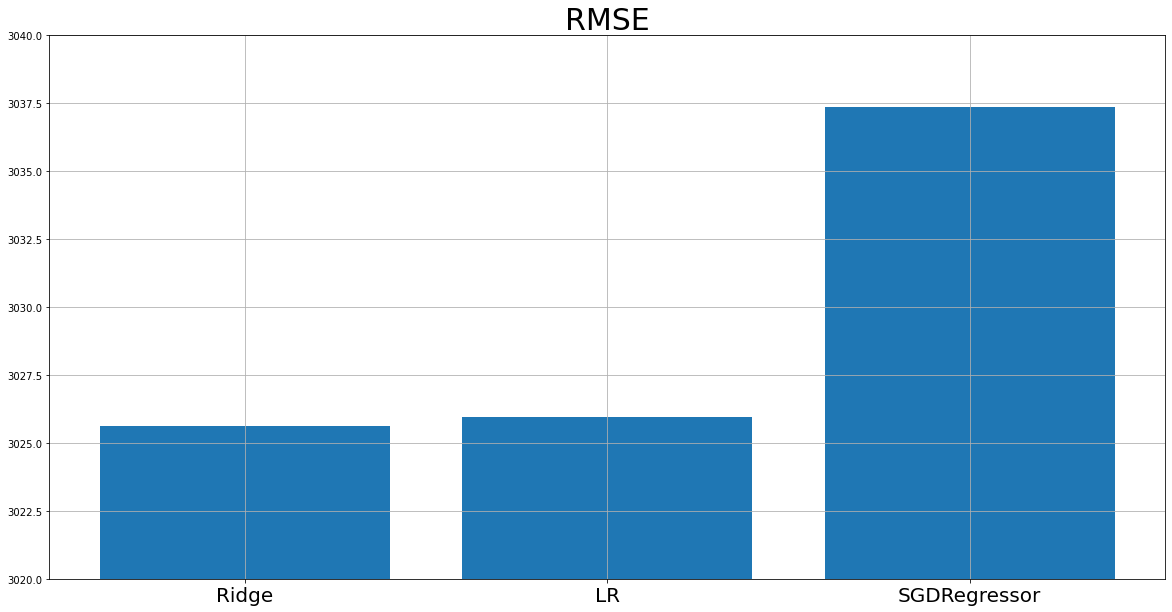

In [ ]:
rmse = np.array([np.sqrt(mse_lr), np.sqrt(mse_ri), np.sqrt(mse_sd)])
labels = np.array(['LR', 'Ridge', 'SGDRegressor'])
indices = np.argsort(rmse)

plt.figure(figsize=(20, 10))
plt.bar(range(len(indices)), rmse[indices])
plt.xticks(range(len(indices)), labels[indices], fontsize=20)
plt.title('RMSE', fontsize=30)
plt.grid()
plt.ylim([3020, 3040]);